## TI602 - Tópicos Inovadores em Computação

#### Trabalho Final - CNN Análise

---

#### Nomes
*   Eduardo de Almeida Migueis - 19167
*   Nícolas Maisonnette Duarte - 19192
*   Rodrigo Smith Rodrigues - 19197

*Trabalho desenvolvido utilizando Google Colab e Jupyter Notebook*.

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import SeparableConv2D, Conv2D, MaxPooling2D, AveragePooling2D, DepthwiseConv2D, Conv2DTranspose
from tensorflow.keras import utils, optimizers, regularizers, initializers

import numpy as np

import matplotlib.pyplot as plt

1. Carregamento do dataset e separação dos dados de treinamento e validação. Todos os treinamentos intermediários devem ser avaliados neste conjunto de validação.

In [ ]:
cifar10 = datasets.cifar10

# Carrega os dados, que já vem divididos em conjunto de treinamento e teste.
(x_trainVal, y_trainVal), (x_test, y_test) = cifar10.load_data()

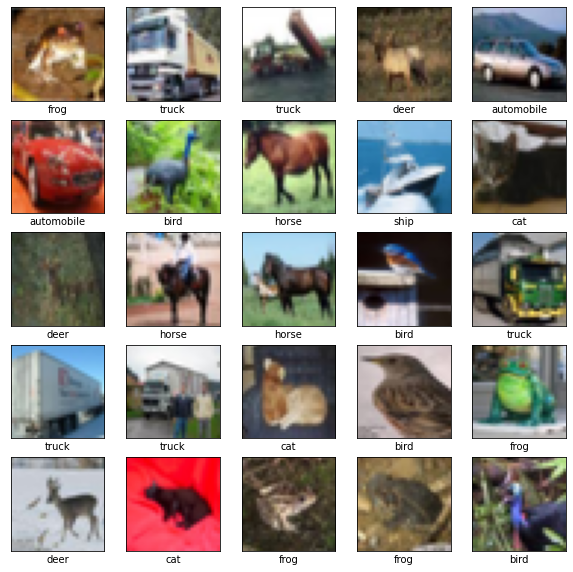

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_trainVal[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_trainVal[i][0]])
plt.show()

In [ ]:
# Embaralha os dados e divide em 80% para treino, 20% para validação (pode utilizar outros percentuais)
nData = x_trainVal.shape[0]  
nTrain = int(nData * 0.8)  
randomIdx = np.random.permutation(np.arange(nData))
trainIdx = randomIdx[:nTrain] 
valIdx = randomIdx[nTrain:]

# Divide os dados
x_val, y_val = x_trainVal[valIdx], y_trainVal[valIdx]
x_train, y_train = x_trainVal[trainIdx], y_trainVal[trainIdx]

# Normalização dados entre [0, 1]
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255
#dividir o y se der problema

print("Formato das imagens de treinamento", x_train.shape)
print("Formato dos rótulos de treinamento", y_train.shape)
#print()

print("Formato das imagens de validação", x_val.shape)
print("Formato dos rótulos de validação", y_val.shape)

historyList = []
legend = []

# Determinar os parâmetros adequados
batch_size = 32
epochs = 10

Formato das imagens de treinamento (40000, 32, 32, 3)
Formato dos rótulos de treinamento (40000, 1)
Formato das imagens de validação (10000, 32, 32, 3)
Formato dos rótulos de validação (10000, 1)


2. Rede neural convolucional baseline. Sugestão: comece por uma arquitetura simples

In [ ]:
# Baseline
model_baseline = Sequential(name='CNN-CIFAR10')
#Camadas
model_baseline.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_baseline.add(MaxPooling2D((2, 2)))
model_baseline.add(Conv2D(64, (3, 3), activation='relu'))
model_baseline.add(MaxPooling2D((2, 2)))

model_baseline.summary()

#Operação de vetorização dos dados
model_baseline.add(Flatten())
#Densa com 10 nós de saída e ativação SoftMax
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

# Criando o modelo (pode alterar os parâmetros)
model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])

historyList.append(model_baseline.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_val, y_val)))

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________
Model: "CNN-CIFAR10"
______________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 10s 8ms/step - loss: 1.5539 - accuracy: 0.4420 - val_loss: 1.3143 - val_accuracy: 0.5398
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1946 - accuracy: 0.5804 - val_loss: 1.1686 - val_accuracy: 0.5890
Epoch 3/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0547 - accuracy: 0.6346 - val_loss: 1.0578 - val_accuracy: 0.6319
Epoch 4/5
1250/1250 [==============================] - 9s 8ms/step - loss: 0.9749 - accuracy: 0.6637 - val_loss: 1.0077 - val_accuracy: 0.6534
Epoch 5/5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9216 - accuracy: 0.6844 - val_loss: 1.0169 - val_accuracy: 0.6541


3. Explore ajustes, etc. (por exemplo o impacto de variar a quantidade de camadas de convolução e pooling, dropout, funções de ativação). Cuidado com overfitting!

In [ ]:
#MODIFICAR - IMP

# Maior precisão, menor perda
# Baseline
model_baseline = Sequential(name='CNN-CIFAR10')
#Camadas
model_baseline.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_baseline.add(MaxPooling2D((2, 2), strides=(1,1)))
model_baseline.add(Conv2D(64, (3, 3), activation='relu'))
model_baseline.add(MaxPooling2D((2, 2), strides=(4,4)))

model_baseline.summary()

#Operação de vetorização dos dados
model_baseline.add(Flatten())
#Densa com 10 nós de saída e ativação SofMax
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

# Criando o modelo (pode alterar os parâmetros)
model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])

historyList.append(model_baseline.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_val, y_val)))


Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________
Model: "CNN-CIFAR10"
______________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 14s 11ms/step - loss: 1.5201 - accuracy: 0.4554 - val_loss: 1.3016 - val_accuracy: 0.5371
Epoch 2/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1895 - accuracy: 0.5859 - val_loss: 1.1421 - val_accuracy: 0.5990
Epoch 3/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0655 - accuracy: 0.6293 - val_loss: 1.1319 - val_accuracy: 0.5965
Epoch 4/5
1250/1250 [==============================] - 13s 10ms/step - loss: 0.9909 - accuracy: 0.6581 - val_loss: 1.0508 - val_accuracy: 0.6302
Epoch 5/5
1250/1250 [==============================] - 13s 10ms/step - loss: 0.9302 - accuracy: 0.6812 - val_loss: 1.0115 - val_accuracy: 0.6463


Modelo inicial de base para a contrução dos outros modelos.

In [ ]:
#MODIFICAR - IMP

# Menor precisão, maior perda
# Baseline
model_baseline = Sequential(name='CNN-CIFAR10')
#Camadas
model_baseline.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_baseline.add(AveragePooling2D((2, 2), strides=(1,1)))
model_baseline.add(Conv2D(64, (3, 3), activation='relu'))
model_baseline.add(AveragePooling2D((2, 2), strides=(4,4)))
model_baseline.summary()

#Operação de vetorização dos dados
model_baseline.add(Flatten())
#Densa com 10 nós de saída e ativação SofMax
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

# Criando o modelo (pode alterar os parâmetros)
model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])

historyList.append(model_baseline.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_val, y_val)))

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d_2 (Averag  (None, 29, 29, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_13 (Conv2D)          (None, 27, 27, 64)        18496     
                                                                 
 average_pooling2d_3 (Averag  (None, 7, 7, 64)         0         
 ePooling2D)                                                     
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________
Model: "CNN-CIFAR10"
______________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 13s 10ms/step - loss: 1.5768 - accuracy: 0.4383 - val_loss: 1.3483 - val_accuracy: 0.5215
Epoch 2/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.2768 - accuracy: 0.5493 - val_loss: 1.2483 - val_accuracy: 0.5552
Epoch 3/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1626 - accuracy: 0.5917 - val_loss: 1.2146 - val_accuracy: 0.5730
Epoch 4/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0801 - accuracy: 0.6234 - val_loss: 1.1147 - val_accuracy: 0.6081
Epoch 5/5
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0186 - accuracy: 0.6474 - val_loss: 1.0889 - val_accuracy: 0.6137


Usa-se average pooling ao invés de max pooling, gerando resultados diferentes observáveis nos gráficos.

In [ ]:
#MODIFICAR - IMP

# perda grande e pouca precisão
# Baseline
model_baseline = Sequential(name='CNN-CIFAR10')
#Camadas
model_baseline.add(SeparableConv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_baseline.add(MaxPooling2D((2, 2), strides=(1,1)))
model_baseline.add(SeparableConv2D(64, (3, 3), activation='relu'))
model_baseline.add(MaxPooling2D((2, 2), strides=(4,4)))

model_baseline.summary()

#Operação de vetorização dos dados
model_baseline.add(Flatten())
#Densa com 10 nós de saída e ativação SofMax
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

# Criando o modelo (pode alterar os parâmetros)
model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])

historyList.append(model_baseline.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_val, y_val)))

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_2 (Separab  (None, 30, 30, 32)       155       
 leConv2D)                                                       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_3 (Separab  (None, 27, 27, 64)       2400      
 leConv2D)                                                       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
Total params: 2,555
Trainable params: 2,555
Non-trainab

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 16s 12ms/step - loss: 1.6873 - accuracy: 0.4035 - val_loss: 1.4820 - val_accuracy: 0.4769
Epoch 2/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3904 - accuracy: 0.5123 - val_loss: 1.3430 - val_accuracy: 0.5300
Epoch 3/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2690 - accuracy: 0.5565 - val_loss: 1.2586 - val_accuracy: 0.5540
Epoch 4/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1959 - accuracy: 0.5809 - val_loss: 1.2261 - val_accuracy: 0.5700
Epoch 5/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1372 - accuracy: 0.6014 - val_loss: 1.1953 - val_accuracy: 0.5784


Usa-se convolução separável 2D, alterando os resultados da camada convolucional que são visíveis no gráfico.

In [ ]:
#MODIFICAR - IMP

# Perda enorme e precisão péssima
# Baseline
model_baseline = Sequential(name='CNN-CIFAR10')
#Camadas
model_baseline.add(DepthwiseConv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model_baseline.summary()

#Operação de vetorização dos dados
model_baseline.add(Flatten())
#Densa com 10 nós de saída e ativação SofMax
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

# Criando o modelo (pode alterar os parâmetros)
model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])

historyList.append(model_baseline.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_val, y_val)))

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d_1 (Depthwi  (None, 1, 1, 3)          3075      
 seConv2D)                                                       
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________
Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d_1 (Depthwi  (None, 1, 1, 3)          3075      
 seConv2D)                                                       
                                                                 
 flatten_10 (Flatten)        (None, 3)                 0         
                                                                 
 dense_10 (Dense)            (No

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 6s 5ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.0960
Epoch 2/5
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.0960
Epoch 3/5
1250/1250 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.0960
Epoch 4/5
1250/1250 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0956
Epoch 5/5
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0999


Sem pooling e apenas uma camada convolucional de dimensão profunda.

In [ ]:
#MODIFICAR - IMP

# Grande precisão e pouca perda
# Baseline
model_baseline = Sequential(name='CNN-CIFAR10')
#Camadas
model_baseline.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_baseline.add(Conv2DTranspose(64, (3, 3), activation='relu'))
model_baseline.add(MaxPooling2D((2, 2), strides=(1,1)))
model_baseline.add(Conv2D(64, (3, 3), activation='relu'))
model_baseline.add(MaxPooling2D((2, 2), strides=(4,4)))

model_baseline.summary()

#Operação de vetorização dos dados
model_baseline.add(Flatten())
#Densa com 10 nós de saída e ativação SofMax
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

# Criando o modelo (pode alterar os parâmetros)
model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])

historyList.append(model_baseline.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_val, y_val)))

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 64)       18496     
 ranspose)                                                       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 19s 15ms/step - loss: 1.4580 - accuracy: 0.4823 - val_loss: 1.1805 - val_accuracy: 0.5797
Epoch 2/5
1250/1250 [==============================] - 18s 14ms/step - loss: 1.0401 - accuracy: 0.6389 - val_loss: 0.9919 - val_accuracy: 0.6541
Epoch 3/5
1250/1250 [==============================] - 18s 14ms/step - loss: 0.9052 - accuracy: 0.6899 - val_loss: 0.9919 - val_accuracy: 0.6610
Epoch 4/5
1250/1250 [==============================] - 18s 14ms/step - loss: 0.8271 - accuracy: 0.7144 - val_loss: 0.9150 - val_accuracy: 0.6838
Epoch 5/5
1250/1250 [==============================] - 17s 14ms/step - loss: 0.7672 - accuracy: 0.7343 - val_loss: 0.8919 - val_accuracy: 0.6979


Uma das camadas de convolução se torna transposta se comparada ao modelo inicial.

In [ ]:
#MODIFICAR - IMP

# menor precisão e bastante perda
# Baseline
model_baseline = Sequential(name='CNN-CIFAR10')
#Camadas - teste de overfitting
model_baseline.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_baseline.add(Conv2DTranspose(64, (3, 3), activation='relu'))
model_baseline.add(MaxPooling2D((2, 2), strides=(1,1)))
model_baseline.add(Conv2D(64, (3, 3), activation='relu'))
model_baseline.add(MaxPooling2D((2, 2), strides=(4,4)))
model_baseline.add(MaxPooling2D((2, 2), strides=(8,8))) # teste com strides maior
model_baseline.add(Conv2DTranspose(64, (3, 3), activation='relu'))

model_baseline.summary()

#Operação de vetorização dos dados
model_baseline.add(Flatten())
#Densa com 10 nós de saída e ativação SofMax
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

# Criando o modelo (pode alterar os parâmetros)
model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])

historyList.append(model_baseline.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_val, y_val)))

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 32, 32, 64)       18496     
 ranspose)                                                       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 19s 15ms/step - loss: 2.0484 - accuracy: 0.2340 - val_loss: 1.9756 - val_accuracy: 0.2731
Epoch 2/5
1250/1250 [==============================] - 19s 15ms/step - loss: 1.9453 - accuracy: 0.2898 - val_loss: 1.9138 - val_accuracy: 0.2872
Epoch 3/5
1250/1250 [==============================] - 19s 15ms/step - loss: 1.8823 - accuracy: 0.3146 - val_loss: 1.8654 - val_accuracy: 0.3296
Epoch 4/5
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8363 - accuracy: 0.3395 - val_loss: 1.8381 - val_accuracy: 0.3299
Epoch 5/5
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8029 - accuracy: 0.3516 - val_loss: 1.8481 - val_accuracy: 0.3360


Neste último modelo, a convolução é feita e transposta duas vezes, com poolings máximos em 3 etapas, gerando resultados muito diferentes.

4. Plote os gráficos da função de loss x número de épocas, para o treino e validação de cada modelo testado/avaliado. Houve overfitting?

In [ ]:
def plot_loss_accuracy(historyList, legend, plotSet="both"):
    linestyles = ['-', '--', ':', '-.']
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

    #Plot Loss
    index = 1
    for idx,hist in enumerate(historyList):
        if plotSet in ["train", "both"]:
            ax1.plot(hist.history['loss'], linestyle=linestyles[idx%len(linestyles)], label = 'Perda de treino ' + str(index))
        if 'val_loss' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax1.plot(hist.history['val_loss'], linestyle=linestyles[idx%len(linestyles)], label = 'Perda de validação ' + str(index))
        index = index + 1
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='upper right')


    #Plot ACC
    index = 1
    for idx,hist in enumerate(historyList): 
        if plotSet in ["train", "both"]:
            ax2.plot(hist.history['accuracy'], linestyle=linestyles[idx%len(linestyles)], label = 'ACC de treino ' + str(index))
        if 'val_accuracy' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax2.plot(hist.history['val_accuracy'], linestyle=linestyles[idx%len(linestyles)], label = 'ACC de validação ' + str(index))
        index = index + 1
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper right')
        
    plt.subplots_adjust(right=0.75)
    plt.show()

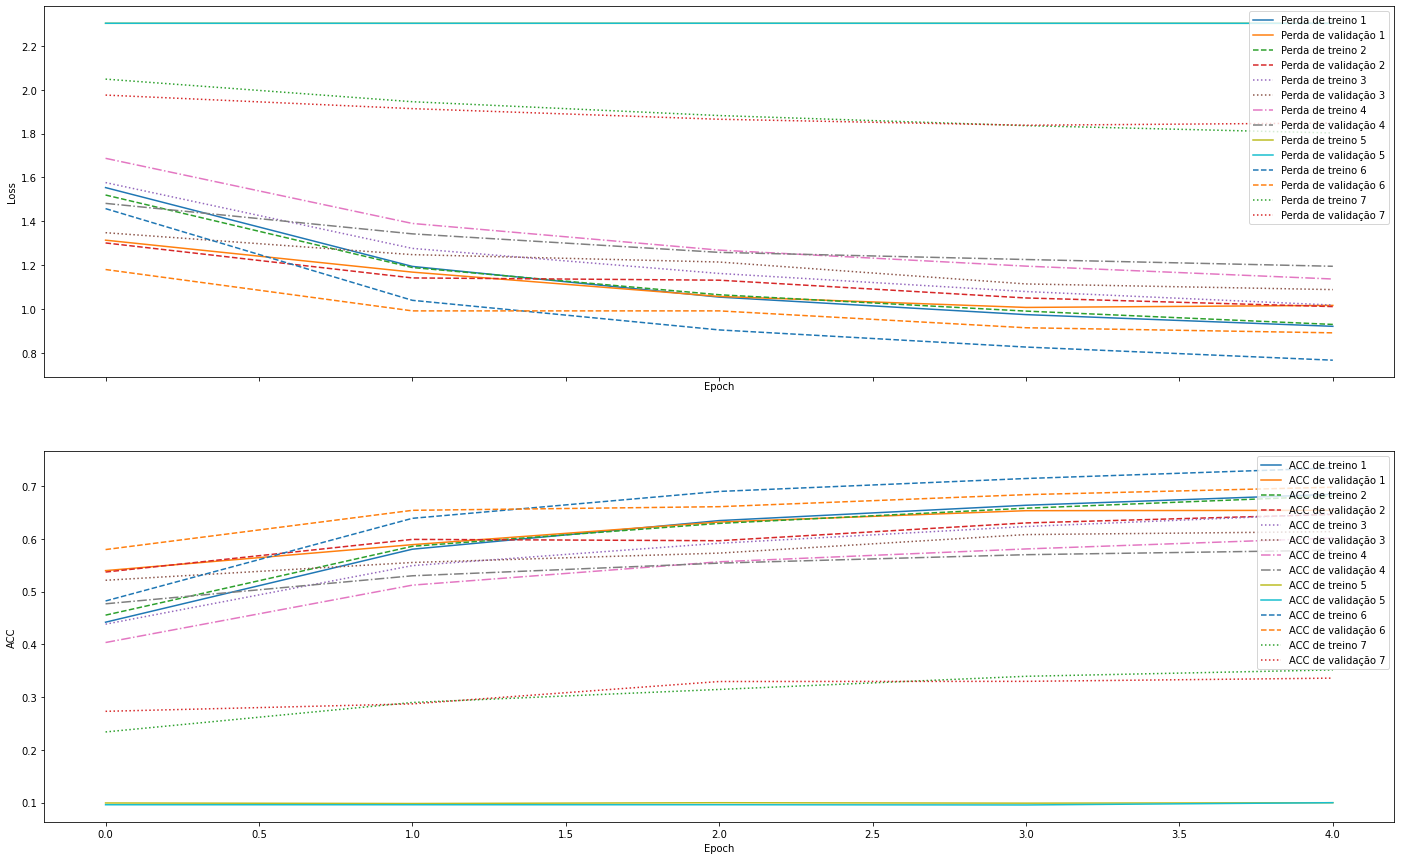

In [ ]:
plt.rcParams['figure.figsize'] = (30,15) 
plot_loss_accuracy(historyList, legend, plotSet='both')

5. A partir dos experimentos acima, construa o que você considera o melhor modelo e faça a avaliação no conjunto de teste. Obs: Avaliação no conjunto de teste só pode ser executada uma única vez.

In [ ]:
#Modelo final

historyListFinal = []
legendFinal = []

# Grande precisão e pouca perda
# Baseline
model_baseline = Sequential(name='CNN-CIFAR10')
#Camadas
model_baseline.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_baseline.add(Conv2DTranspose(64, (3, 3), activation='relu'))
model_baseline.add(MaxPooling2D((2, 2), strides=(1,1)))
model_baseline.add(Conv2D(64, (3, 3), activation='relu'))
model_baseline.add(MaxPooling2D((2, 2), strides=(4,4)))

model_baseline.summary()

#Operação de vetorização dos dados
model_baseline.add(Flatten())
#Densa com 10 nós de saída e ativação SofMax
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

# Criando o modelo (pode alterar os parâmetros)
model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])

historyListFinal.append(model_baseline.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_val, y_val)))

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 32, 32, 64)       18496     
 Transpose)                                                      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 18s 14ms/step - loss: 1.4663 - accuracy: 0.4753 - val_loss: 1.1901 - val_accuracy: 0.5714
Epoch 2/5
1250/1250 [==============================] - 17s 13ms/step - loss: 1.0648 - accuracy: 0.6329 - val_loss: 1.0239 - val_accuracy: 0.6452
Epoch 3/5
1250/1250 [==============================] - 18s 14ms/step - loss: 0.9334 - accuracy: 0.6793 - val_loss: 1.0203 - val_accuracy: 0.6460
Epoch 4/5
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8521 - accuracy: 0.7070 - val_loss: 0.9020 - val_accuracy: 0.6872
Epoch 5/5
1250/1250 [==============================] - 18s 14ms/step - loss: 0.7960 - accuracy: 0.7235 - val_loss: 0.9048 - val_accuracy: 0.6876


In [ ]:
def plot_loss_accuracy(historyList, legend, plotSet="both"):
    linestyles = ['-', '--', ':', '-.']
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

    #Plot Loss
    index = 1
    for idx,hist in enumerate(historyList):
        if plotSet in ["train", "both"]:
            ax1.plot(hist.history['loss'], linestyle=linestyles[idx%len(linestyles)], label = 'Perda de treino ' + str(index))
        if 'val_loss' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax1.plot(hist.history['val_loss'], linestyle=linestyles[idx%len(linestyles)], label = 'Perda de validação ' + str(index))
        index = index + 1
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='upper right')


    #Plot ACC
    index = 1
    for idx,hist in enumerate(historyList): 
        if plotSet in ["train", "both"]:
            ax2.plot(hist.history['accuracy'], linestyle=linestyles[idx%len(linestyles)], label = 'ACC de treino ' + str(index))
        if 'val_accuracy' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax2.plot(hist.history['val_accuracy'], linestyle=linestyles[idx%len(linestyles)], label = 'ACC de validação ' + str(index))
        index = index + 1
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper right')
        
    plt.subplots_adjust(right=0.75)
    plt.show()

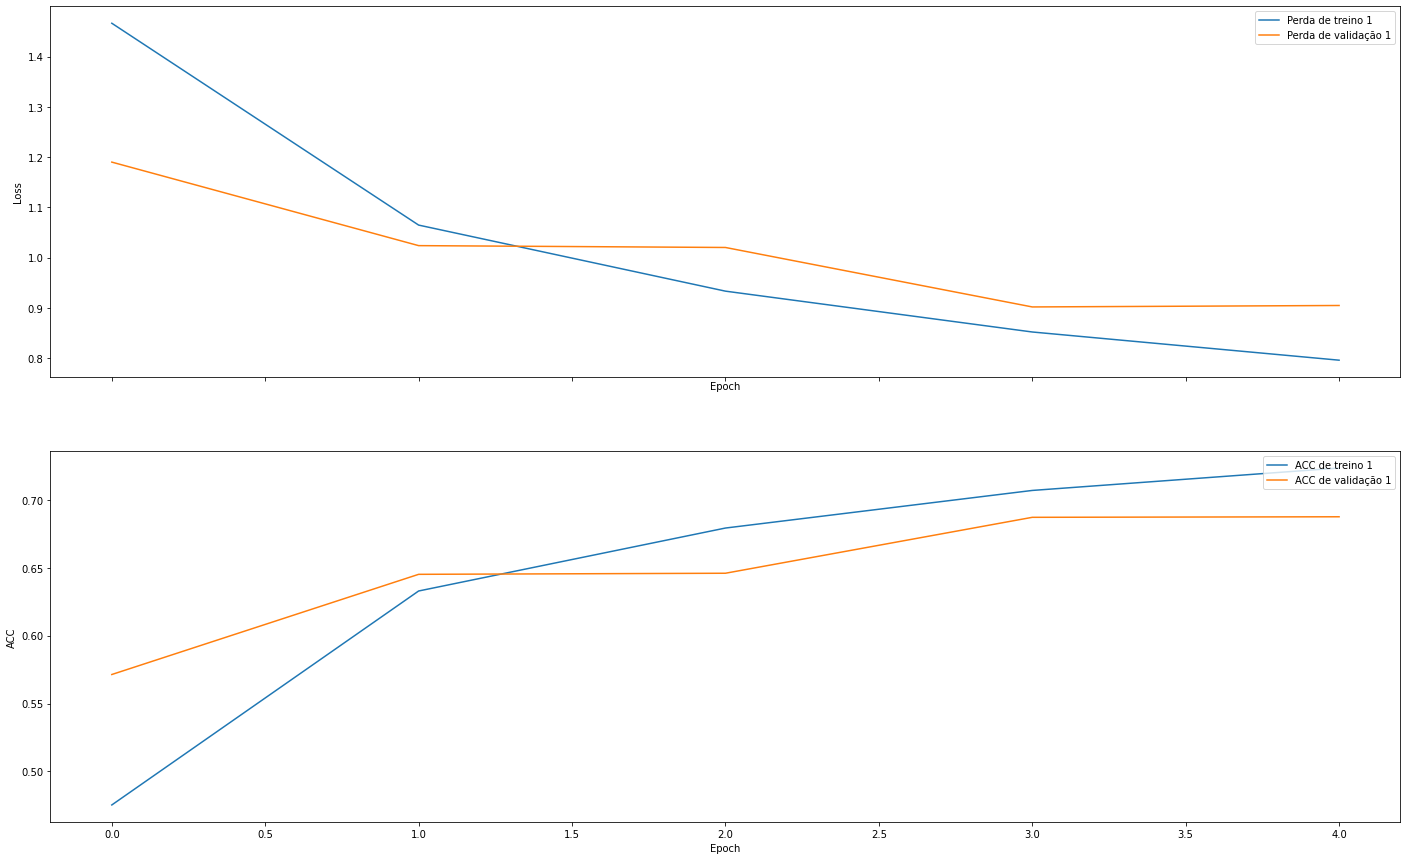

In [ ]:
plt.rcParams['figure.figsize'] = (30,15) 
plot_loss_accuracy(historyListFinal, legendFinal, plotSet='both')

# Análise dos Resultados

O melhor modelo que analisamos usa uma janela de pooling de dimensões iguais (2, 2) em max pooling com strides de dimensões iguais aplicadas duas vezes (1, 1 e 4, 4). A camada convolucional 2D cria um kernel de tamanho 3x3 de convolução que é convolvido com a entrada da camada para produzir um tensor de saídas. Essa camada é aplicada 3 vezes, sendo a do meio transposta. A necessidade de convoluções transpostas vem de usar uma transformação indo na direção oposta de uma convolução normal, ou seja, de algo que tem a forma de saída de alguma convolução para algo que tem a forma de sua entrada, mantendo uma padrão de conectividade compatível com a referida convolução. Isso é feito para que o pooling seja aplicado sobre um filter transposto maior(de 32 para 64), porém com a mesma dimensão de strides. A função de ativação usada é a ReLU, pois ela é contínua, mas não é diferenciável porque sua derivada é 0 para qualquer entrada negativa. A saída de ReLU não tem um valor máximo (não é saturada) e isso ajuda na descida do gradiente.(daí os padrões bons de perda). Além disso, a função ReLU é muito rápida de calcular (se comparada com Sigmoid e Tanh). Ao fim do modelo, se adiciona uma camada comum densa NN com dimensão de output 10 e função de ativação softmax. O modelo como um todo apresenta a precisão de treinamento próxima a de validação na faixa de valor 0.75 que é um bom parâmetro de precisão, já que mais que isso poderia causar overfitting. A diferença entre o treinamento e teste é pequena (menor que 0.4), o que significa que não houve overfitting. Tanto a precisão como a perda têm seus valores de validação e treino crescendo ou decrescendo em uma mesma tendência, o que indica que o modelo está bem equilibrado.
